# Importing Libraries and Outlining Analysis Goals

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
from sklearn.preprocessing import StandardScaler
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'/Users/danielmccormick/Desktop/CareerFoundry/Advanced Analytics & Dashboard Design'

Potential data sets to run through k-means clustering process: 
 
- EV_sales_stock_imputed - clustering countries by sales, stock, and percetnage of stock sold 
- EV_sales_stock_share_imputed - clustering countries by sales, stock, percentage of stock sold, EV share of sales, EV share of stock 
- EV_total_imputed - clustering by all variables available in the data set including charger count

All of these data sets contain data that varies widely in scale. From tiny percentages for the share of sales and share of stock variables to the huge values for EV sales and stock. So all data will have to be standardized before clustering. 

# K-mean clustering by EV sales, EV Stock, and Share of Stock Sold 

In [4]:
df_sales_stock = pd.read_csv(os.path.join(path, 'Electric_Vehicles', 'Data','Cleaned_Data', 'EV_Sales_Stock_imputed.csv'))

In [5]:
df_sales_stock.head()

,region,vehicle_type,powertrain_type,year,ev_sales,ev_stock,share_of_stock_sold
0,Australia,Cars,BEV,2010,0,0,0.00000
1,Australia,Cars,PHEV,2010,0,0,0.00000
2,Australia,Cars,BEV,2011,49,49,1.00000
3,Australia,Cars,PHEV,2011,0,0,0.00000
4,Australia,Cars,BEV,2012,170,220,0.77273


After running this analysis it became clear that a few rows where there are EV sales, while EV stock was either zero or a small value were skewing the clustering algorithm (for example a row with 55 EVs sold and an EV stock value of 1 would have a share of stock sold of 55, which is actually 5,500%). These rows were kept in the data set because there are only a few of them. But for this analysis, it is necessary to remove these rows. 

In [6]:
df_sales_stock = df_sales_stock[df_sales_stock['share_of_stock_sold'] <= 1]

In [7]:
df_sales_stock.reset_index()

,index,region,vehicle_type,powertrain_type,year,ev_sales,ev_stock,share_of_stock_sold
0,0,Australia,Cars,BEV,2010,0,0,0.00000
1,1,Australia,Cars,PHEV,2010,0,0,0.00000
2,2,Australia,Cars,BEV,2011,49,49,1.00000
3,3,Australia,Cars,PHEV,2011,0,0,0.00000
4,4,Australia,Cars,BEV,2012,170,220,0.77273
...,...,...,...,...,...,...,...,...
4633,4675,World,Total,PHEV,2020,976620,3508500,0.27836
4634,4676,World,Total,BEV,2021,4845000,12440000,0.38947
4635,4677,World,Total,PHEV,2021,1909200,5314000,0.35928
4636,4678,World,Total,BEV,2022,7721000,19930000,0.38741


In [8]:
# dropping categorical variables and creating a new dataframe. 
df_sales_stock_num = df_sales_stock.drop(['region', 'vehicle_type', 'powertrain_type'], axis=1)

In [9]:
# This clustering analysis will be done on the ev_sales, ev_stock, and share_of_stock_sold variables. Since the 
# first two columns are large numeric values and the third is a percentrage betwen 0-1, the values will need to 
# standardized. 
df_sales_stock_num.head()

,year,ev_sales,ev_stock,share_of_stock_sold
0,2010,0,0,0.00000
1,2010,0,0,0.00000
2,2011,49,49,1.00000
3,2011,0,0,0.00000
4,2012,170,220,0.77273


In [10]:
# Standardizing the data set for clustering. 
scaler = StandardScaler()
df_sales_stock_num_norm = scaler.fit_transform(df_sales_stock_num)

In [11]:
df_sales_stock_num_norm

array([[-1.60335756, -0.12254   , -0.12910051, -0.81448573],
       [-1.60335756, -0.12254   , -0.12910051, -0.81448573],
       [-1.33610249, -0.12234729, -0.12902735,  2.75553464],
       ...,
       [ 1.33644823,  7.38574045,  7.80538833,  0.46815119],
       [ 1.6037033 , 30.24171378, 29.62896545,  0.56857586],
       [ 1.6037033 , 11.32864951, 11.87416553,  0.47861135]])

In [12]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [13]:
score = [kmeans[i].fit(df_sales_stock_num_norm).score(df_sales_stock_num_norm) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option. 

score

/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarni

[-18552.000000000076,
 -12403.44917183456,
 -8702.588968109372,
 -6096.951298449541,
 -4229.873909367165,
 -3374.0493594254476,
 -2885.637936953506,
 -2425.60111263195,
 -2072.3173887585554]

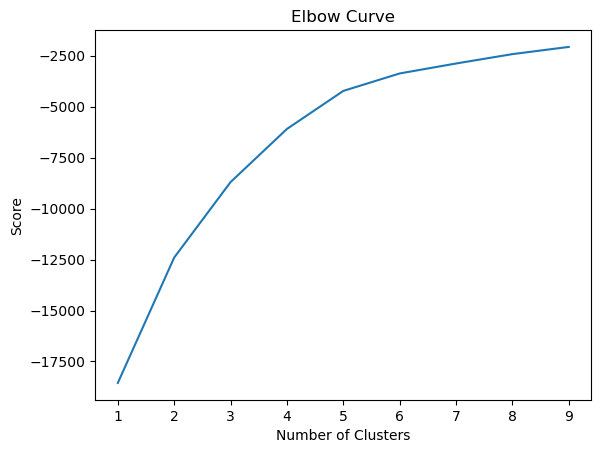

In [14]:
# Plot the elbow curve based on the above scores using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Based on the elbow curve visualization, there is significant variation between 1 and 2, 2 and 3, and 3 and 4 clusters, but then the variance between the clusters decreases significantly. For that reason, 4 clusters will be used for the analysis. 

In [15]:
# Create the k-means object with 4 clusters and and fitting it to the data set. 

kmeans = KMeans(n_clusters = 4) 


In [16]:
kmeans.fit(df_sales_stock_num_norm)

/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [17]:
# adding a new column to the data set that lists which cluster the row belongs to and counting how many
# rows belong to each cluster. 
df_sales_stock_num['clusters'] = kmeans.fit_predict(df_sales_stock_num_norm)

/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [18]:
df_sales_stock_num.head()

,year,ev_sales,ev_stock,share_of_stock_sold,clusters
0,2010,0,0,0.00000,3
1,2010,0,0,0.00000,3
2,2011,49,49,1.00000,1
3,2011,0,0,0.00000,3
4,2012,170,220,0.77273,1


In [19]:
df_sales_stock_num['clusters'].value_counts()

clusters
0    1997
3    1718
1     911
2      12
Name: count, dtype: int64

# Visualizing the Clusters on Scatterplots

/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


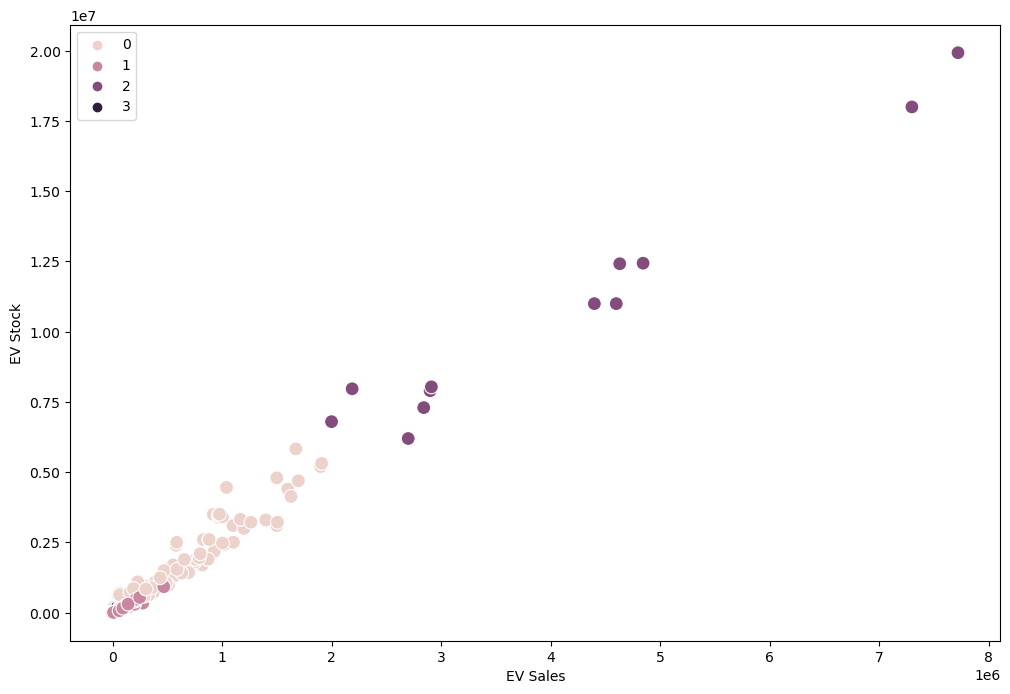

In [20]:
# Plot the clusters for the "EV Sales" and "EV Stock" variable with the values color coded by cluster. 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sales_stock_num['ev_sales'], y=df_sales_stock_num['ev_stock'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('EV Sales') # Label x-axis.
plt.ylabel('EV Stock') # Label y-axis.
plt.show()

When looking at the plot of EV Sales and EV stock the positive linear relationship between the variables is clear. With the correlation so strong between these variables it seems as though the clusters roughly fall into categories where 1 and 3 is for values with low sales and low stock. It will be interesting to see what the difference between these two clusters is when the mean and median of each is calculated below. Cluster 0 corresponds to values with a higher amount of EV sales and EV stock, while cluster 2 is only a few data points and corresponds to the highest amounts of EV sales and EV stock. It will be interesting the see how these clusters looks when EV sales and EV stock are plotted against share of stock sold. 

/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


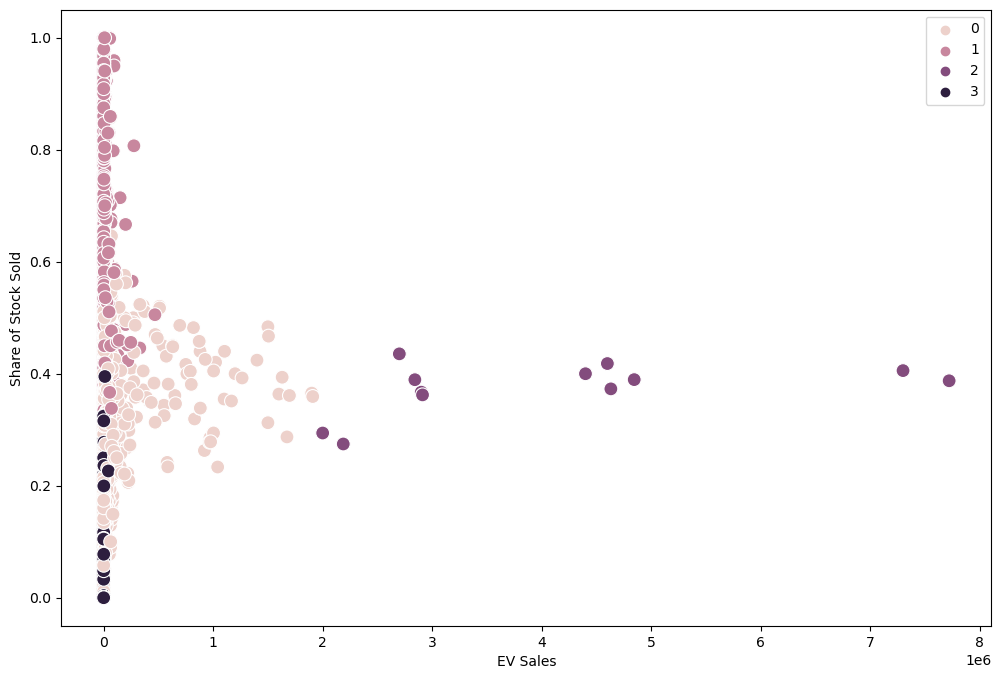

In [21]:
# Plot the clusters for the "EV Sales" and "Share of Stock Sold" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sales_stock_num['ev_sales'], y=df_sales_stock_num['share_of_stock_sold'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('EV Sales') # Label x-axis.
plt.ylabel('Share of Stock Sold') # Label y-axis.
plt.show()

This plot helps to explain the difference between cluster 1 and cluster 3, which are both clusters of data points that represent small amounts of EV sales. Cluster 1 seems to correspond to data points where EV sales were low, but the percentage of available stock that was sold was high. Cluster 3 corresponds to data points where both sales were low and share of stock sold was low. It is interesting to see that most of the values near the top of the plot are from cluster 1, which indicate that the only times countries sold through close to 100% of the available EV stock for a given year was when total EV sales were relatively low. 

It is also interesting to note that almost all of the data points in cluster 0, and all of the data points for cluster 2, fall betweeen 20% and 60% for share of vehicles sold. This indicates that for countries that have higher total EV sales, they are typically selling through 20%-60% of the available stock in any given year. Cluster 2 speciifcally seems to only fall within the range of 30-50%, indicating that for the countries with the highest EV sales (most likely China but also maybe the United States) typical sell through is around 30-50% of available stock. 

/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


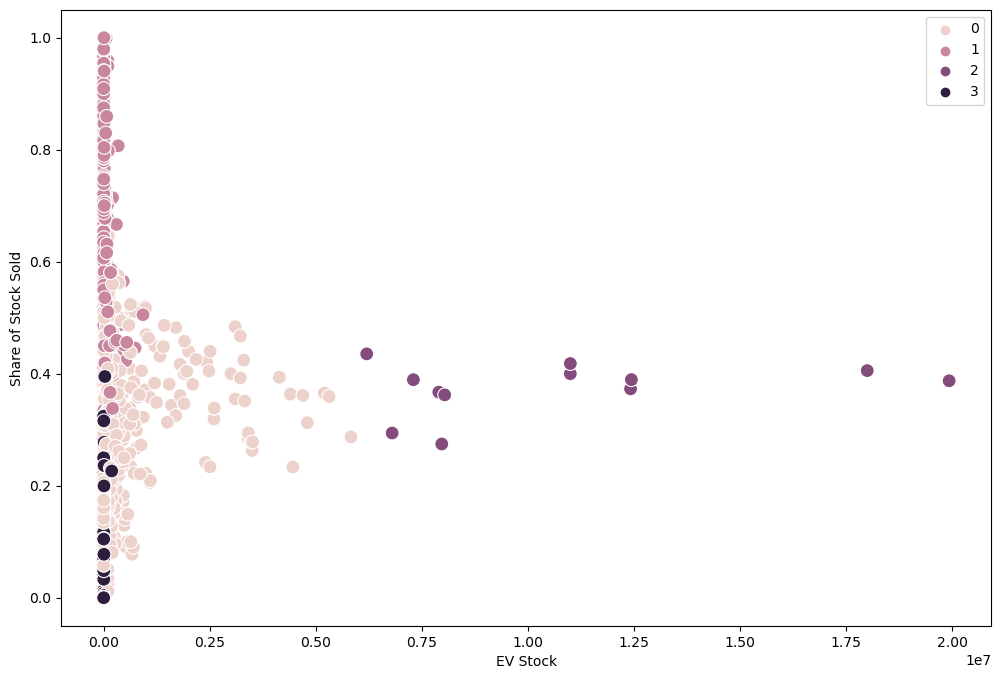

In [22]:
# Plot the clusters for the "EV Stock" and "Share of Stock Sold" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sales_stock_num['ev_stock'], y=df_sales_stock_num['share_of_stock_sold'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('EV Stock') # Label x-axis.
plt.ylabel('Share of Stock Sold') # Label y-axis.
plt.show()

The plot of EV stock and share of stock sold looks very similar to the previous plot with EV sales and share of stock sold. This makes sense considering the strong, positive correlation between EV sales and EV stock. Again, cluster 3 is low share of stock sold and low stock, while 1 is high share of stock sold and low stock. 

Simiar to the previous plot as well is the placement of clusters 0 and 2 (higher EV stock) which again mostly fall between 20-60% of EV stock sold. 

# Statistical Analysis & Conclusions

In [23]:
# renaming the clusters to their corresponding color and calculating the mean and median of each variable across
# each cluster
df_sales_stock_num.loc[df_sales_stock_num['clusters'] == 3, 'cluster'] = 'black'
df_sales_stock_num.loc[df_sales_stock_num['clusters'] == 2, 'cluster'] = 'dark purple'
df_sales_stock_num.loc[df_sales_stock_num['clusters'] == 1, 'cluster'] = 'light purple'
df_sales_stock_num.loc[df_sales_stock_num['clusters'] == 0, 'cluster'] = 'pink'

/var/folders/3x/syx5xv_d21d0hk0ckl4_nnr40000gn/T/ipykernel_9120/3236188902.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'black' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_sales_stock_num.loc[df_sales_stock_num['clusters'] == 3, 'cluster'] = 'black'


In [24]:
df_sales_stock_num.groupby('cluster').agg({'ev_sales':['mean', 'median'], 
                          'ev_stock':['mean', 'median'],'share_of_stock_sold':['mean', 'median']})

ev_sales                 ev_stock             \
                      mean     median          mean     median   
cluster                                                          
black         2.327136e+02        0.0  1.006831e+03        0.0   
dark purple   4.086650e+06  3655900.0  1.074992e+07  9519500.0   
light purple  1.145579e+04      610.0  2.174732e+04     1000.0   
pink          4.238427e+04      200.0  1.254257e+05      800.0   

             share_of_stock_sold            
                            mean    median  
cluster                                     
black                   0.029376  0.000000  
dark purple             0.374693  0.388365  
light purple            0.670223  0.616080  
pink                    0.196596  0.200000

The above results seem to correspond to the analyses of the plots above. 

- Black, cluster 3, corresponds to low levels of EV sales and stock and low levels of share of stock sold. The mean of EV sales is 232 and mean of EV stock is just over 1,000. Then a mean of share of stock sold of around 2.9%. These are countries with both small and sluggish EV markets. 
- Light purple, cluster 1 corresponds to low levels of EV sales and stock (though more than the black cluster) but much higher levels of share of stock sold. A mean of about 11,000 vehicles sold with an average stock of about 21,000, but a mean for share of vehicles sold all the way at 67%. These are markets with relatively small sales and stock, but high demand for EVs. 
- Dark purple, cluster 2, corresponds to a small number of data points for countries with massive amounts of EV sales and stock. A mean for EV sales of 4 million with mean EV stock of over 10 million, these data points correspond to China, and maybe the US in the most recent few years of the data set. It is interesting to see that both the mean and median for share of vehicles sold is right around 38%. It seems fair to say that in markets where there are significant EV sales and stock, usually arund 40% of the available vehicles are sold in a given year. 
- The pink, cluster 0 is for markets that have significant EV sales and stock, more than cluster 1 but much less than cluster 2, and about 20% of stock sold each year. These are most likely mid sized EV markets with average demand for EVs. 

When interpreting these results for the EV analysis a few key conclusions can be drawn that can be used to inform further analysis and visualizations. 

- The only markets where EV sell through is consistenty around 60% or higher are small markets with low sales. 
- The most common markets are mid-sized in terms of sales and stock with a farily large range of vehicle sell through (mostly between 20-60%). 
- There are a few data points, that most likely correspond to China and maybe the US in recent years where EV sales and stock are massive and sell through is around 40%. These markets are not only huge but demand is mostly above average as well. 

# K Means Clustering by EV Sales, EV Stock, EV Share of Sales, and EV Share of Stock. 

In [25]:
# importing data set that includes ev share of sales and ev share of stock and dropping categorical variables
df_sales_stock_share = pd.read_csv(os.path.join(path, 'Electric_Vehicles', 'Data','Cleaned_Data', 'EV_Sales_Stock_Share_imputed.csv'))

In [26]:
df_sales_stock_share.head()

,region,vehicle_type,year,ev_sales,ev_stock,ev_sales_share,ev_stock_share,share_of_stock_sold
0,Australia,Cars,2010,0,0,0.00000,0.00000,0.00000
1,Australia,Cars,2011,49,49,0.00007,0.00000,1.00000
2,Australia,Cars,2012,250,300,0.00030,0.00003,0.83333
3,Australia,Cars,2013,290,590,0.00034,0.00005,0.49153
4,Australia,Cars,2014,1320,1880,0.00160,0.00017,0.70213


In [27]:
df_sales_stock_share_num = df_sales_stock_share.drop(['region', 'vehicle_type'], axis=1)

In [28]:
df_sales_stock_share_num.head()

,year,ev_sales,ev_stock,ev_sales_share,ev_stock_share,share_of_stock_sold
0,2010,0,0,0.00000,0.00000,0.00000
1,2011,49,49,0.00007,0.00000,1.00000
2,2012,250,300,0.00030,0.00003,0.83333
3,2013,290,590,0.00034,0.00005,0.49153
4,2014,1320,1880,0.00160,0.00017,0.70213


To avoid issues with the creation of the clusters any values for ev_sales_share, ev_stock_share, and share_of_stock_sold above 1 will be removed. 

In [29]:
df_sales_stock_share_num = df_sales_stock_share_num[df_sales_stock_share_num['share_of_stock_sold'] <= 1]

In [30]:
df_sales_stock_share_num = df_sales_stock_share_num[df_sales_stock_share_num['ev_sales_share'] <= 1]

In [31]:
df_sales_stock_share_num = df_sales_stock_share_num[df_sales_stock_share_num['ev_stock_share'] <= 1]

In [32]:
df_sales_stock_share_num.reset_index()

,index,year,ev_sales,ev_stock,ev_sales_share,ev_stock_share,share_of_stock_sold
0,0,2010,0,0,0.00000,0.00000,0.00000
1,1,2011,49,49,0.00007,0.00000,1.00000
2,2,2012,250,300,0.00030,0.00003,0.83333
3,3,2013,290,590,0.00034,0.00005,0.49153
4,4,2014,1320,1880,0.00160,0.00017,0.70213
...,...,...,...,...,...,...,...
2315,2335,2018,2286390,6034800,0.02149,0.00441,0.37887
2316,2336,2019,2259380,8334800,0.02315,0.00577,0.27108
2317,2337,2020,3164620,11478500,0.03635,0.00778,0.27570
2318,2338,2021,6754200,17754000,0.07327,0.01186,0.38043


Since the scale of the data varies significantly, it will have to be standardized. 

In [33]:
# Standardizing the data set for clustering. 
scaler = StandardScaler()
df_sales_stock_share_num_norm = scaler.fit_transform(df_sales_stock_share_num)

In [34]:
df_sales_stock_share_num_norm

array([[-1.60141648e+00, -1.34266915e-01, -1.40299358e-01,
        -3.21624036e-01, -2.84348378e-01, -1.00822965e+00],
       [-1.33380241e+00, -1.34161393e-01, -1.40259596e-01,
        -3.20739261e-01, -2.84348378e-01,  2.66066128e+00],
       [-1.06618833e+00, -1.33728539e-01, -1.40055920e-01,
        -3.17832143e-01, -2.82540103e-01,  2.04916723e+00],
       ...,
       [ 1.07472429e+00,  6.68074957e+00,  9.17402415e+00,
         1.37827042e-01,  1.84597592e-01,  3.28357831e-03],
       [ 1.34233837e+00,  1.44109184e+01,  1.42663304e+01,
         6.04482719e-01,  4.30522985e-01,  3.87526525e-01],
       [ 1.60995245e+00,  2.27634925e+01,  2.25553764e+01,
         1.20398106e+00,  8.46426223e-01,  3.86535924e-01]])

In [35]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [37]:
score = [kmeans[i].fit(df_sales_stock_share_num_norm).score(df_sales_stock_share_num_norm) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option. 

score

/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarni

[-13920.000000000045,
 -10367.195349253023,
 -7695.7962645301595,
 -5852.711461863372,
 -4575.607042761372,
 -3621.4254302832196,
 -2878.2245228365023,
 -2489.3778190397443,
 -2226.419978264823]

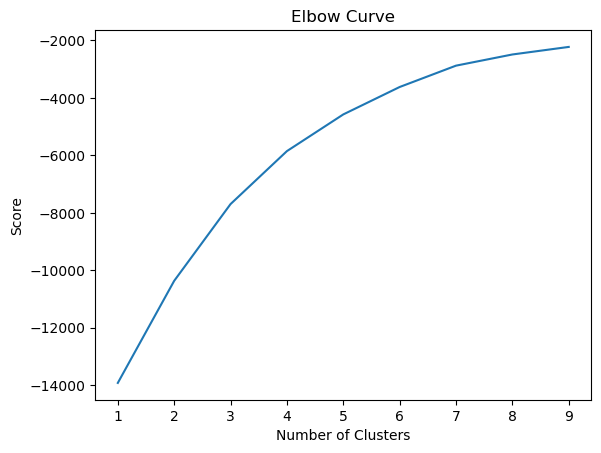

In [38]:
# Plot the elbow curve based on the above scores using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

There is not a clear point where the elbow "bends" in the elbow curve, but it seems as though it starts to level off more quickly after 4. So 4 clusters will be used again. 

In [39]:
# Create the k-means object with 4 clusters and and fitting it to the data set. 

kmeans = KMeans(n_clusters = 4) 


In [40]:
kmeans.fit(df_sales_stock_share_num_norm)

/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [41]:
# adding a new column to the data set that lists which cluster the row belongs to and counting how many
# rows belong to each cluster. 
df_sales_stock_share_num['clusters'] = kmeans.fit_predict(df_sales_stock_share_num_norm)

/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [42]:
df_sales_stock_share_num.head()

,year,ev_sales,ev_stock,ev_sales_share,ev_stock_share,share_of_stock_sold,clusters
0,2010,0,0,0.00000,0.00000,0.00000,2
1,2011,49,49,0.00007,0.00000,1.00000,0
2,2012,250,300,0.00030,0.00003,0.83333,0
3,2013,290,590,0.00034,0.00005,0.49153,0
4,2014,1320,1880,0.00160,0.00017,0.70213,0


In [43]:
df_sales_stock_share_num['clusters'].value_counts()

clusters
2    1125
0    1122
1      63
3      10
Name: count, dtype: int64

# Visualizing the Clusters on Scatterplots

Since the relationship between EV sales and EV stock is well understood, and because the relationship between EV Sales/EV stock and Share of Stock Sold was analyzed in detal above, other variables from the data set will be plotted to understand how the clusters behave across those variables. 

/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


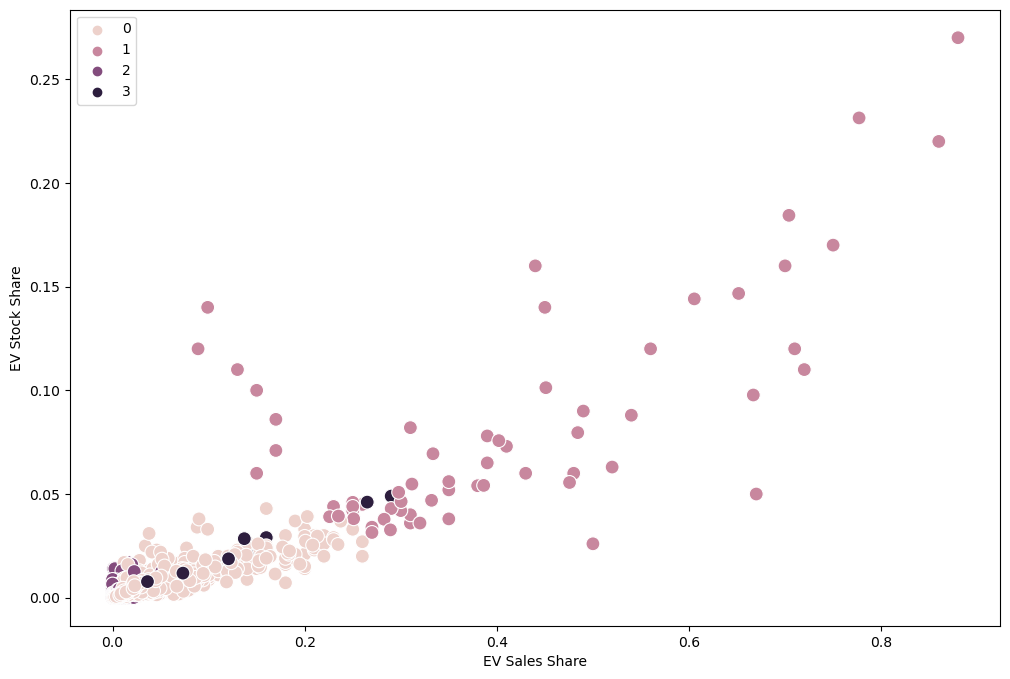

In [47]:
# Plot the clusters for the "EV Sales Share" and "EV Stock Share" variable with the values color coded by cluster. 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sales_stock_share_num['ev_sales_share'], y=df_sales_stock_share_num['ev_stock_share'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('EV Sales Share') # Label x-axis.
plt.ylabel('EV Stock Share') # Label y-axis.
plt.show()

EV sales share and EV stock share have a positive linear relationship which is clear from the plot. There are some outliers which were noted in a previous analysis when looking at the correlation of these variables. 

It seems like at a high level, cluster 2, dark purple dots, correspond to data points where there are low EV sales share and low EV stock share, cluster 0, pink, are for data points with slightly higher but still relatively low values for both variables, and cluster 1, light purple are for values with higher ev sales share and ev stock share. It is hard to get an understanding of what cluster 3, black, corresponds to from this plot. Plotting other variables and calculating the statistics for the clusters will hopefully clear this up. 

/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


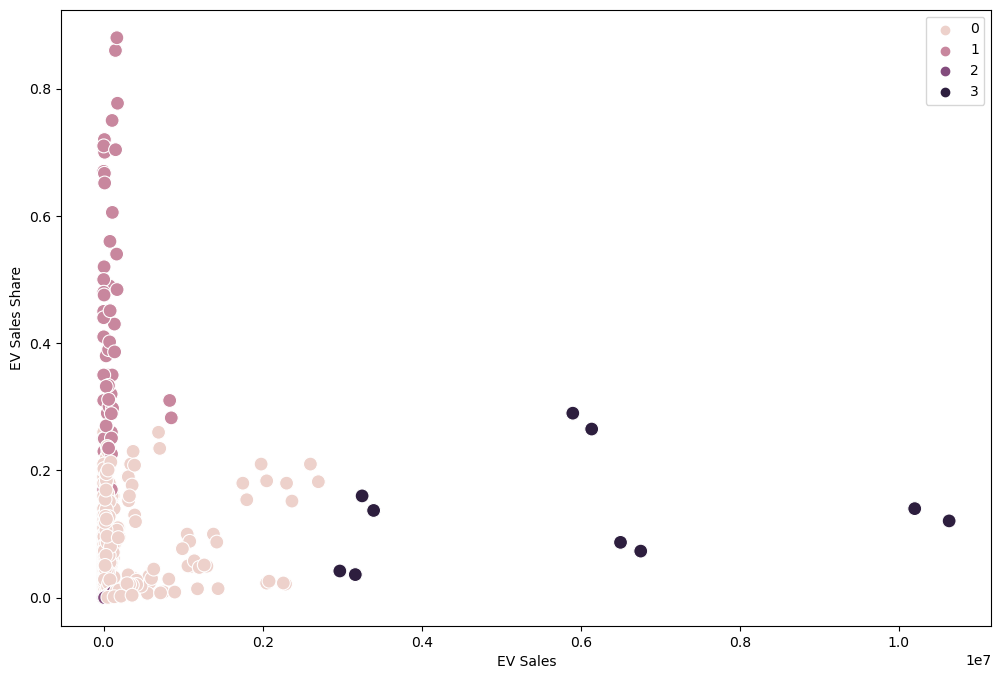

In [48]:
# Plot the clusters for the "EV Sales" and "EV Sales Share" variable with the values color coded by cluster. 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sales_stock_share_num['ev_sales'], y=df_sales_stock_share_num['ev_sales_share'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('EV Sales') # Label x-axis.
plt.ylabel('EV Sales Share') # Label y-axis.
plt.show()

This plots shows the EV sales and EV sales share. It helps to illustrate how the clusters are broken up a bit more. 

Cluster 1, light purple corresponds to data points where the EV sales share is very high. It is interesting to note that these data points are only found on the far left side of the plot, meaning that in countries where EV share of sales is very high (about 25% of higher), total EV sales are relatively low. These are most likely smaller markets with huge EV sales penetration like Norway or Iceland. 

It seems as though cluster 2 dark purple corresponds to values where sales are very small and EV share of sales are very small. 

Cluster 0, pink corresponds to data points where the share of sales varies between about 0-30%, and sales are large, but not the largest in the data set. These are most likely the mid-sized markets with average EV demand. 

Finally, the plot helps to show what makes cluster 3, black different from cluster 0, pink. Both clusters have similar EV share of sales, but cluster 3, black is for only a small number of data points that correspond to massive EV sales. These again are China and maybe a few data points for the United States in recent years. 

Since EV Sales and EV Stock have such a strong, positive linear correlation, and EV Share of Sales and EV Share of Stock also have a strong, positive, linear correlation, a plot that shows any combination of these variables will result in a very similar visualization and conclusions as the above plot. 

/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


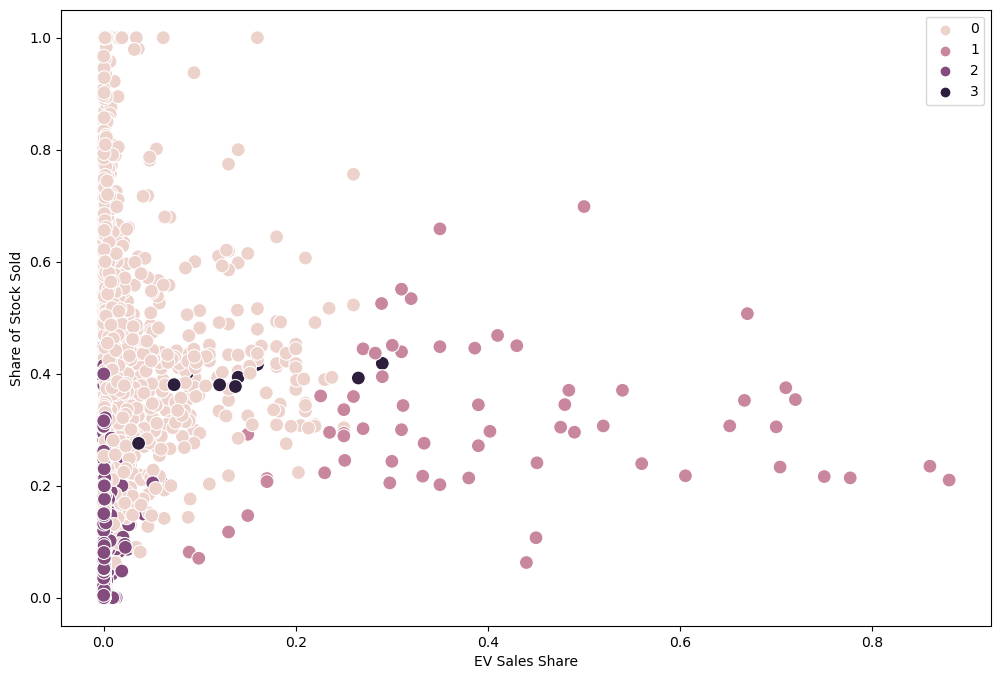

In [52]:
# Plot the clusters for the "EV Sales Share" and "Share of Stock Sold" variable with the values color coded by cluster. 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sales_stock_share_num['ev_sales_share'], y=df_sales_stock_share_num['share_of_stock_sold'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('EV Sales Share') # Label x-axis.
plt.ylabel('Share of Stock Sold') # Label y-axis.
plt.show()

It is clear from this plot again that a majority of data points fall within about 20-60% of share of stock sold. Also most data points at the extreme ends of share of stock sold are on the left side of the plot meaning that for markets with very low or high share of stock sold, EVs do not make up a signiicant amount of the total vehicle market. 

Cluster 2, dark purple, corresponds to data points with very low EV sales share, but it does have values spread between about 0-50% of share of stock sold. These seem to be markets where the amount of EVs available and amount sold are very low, but the share of available EVs that are sold varies. 

Cluster 0, pink, seems to have a very wide range of values for share of stock sold, but corresponds to roughly 0-40% EV sales share. In these markets EVs have a smaller share of the total vehicle market, but the amount of EVs sold vs. how many are available varies a lot. 

Cluster 1, light purple, has a smaller range for share of stock sold, mostly within 20-50%, but a much wider range for EV sales share. These are markets where EVs make up a more significant portion of all vehicle sales and not as large of a portion of available vehicles are sold each year. 

Finally, cluster 3, black, which is for data points with massive amounts of EV sales and stock, has a range of about 10-40% of EV sales share, and is very consistent with about 40% of available stock sold. Again this is most likely China. 

# Statistical Analysis & Conclusions

In [55]:
# renaming the clusters to their corresponding color and calculating the mean and median of each variable across
# each cluster
df_sales_stock_share_num.loc[df_sales_stock_share_num['clusters'] == 3, 'cluster'] = 'black'
df_sales_stock_share_num.loc[df_sales_stock_share_num['clusters'] == 2, 'cluster'] = 'dark purple'
df_sales_stock_share_num.loc[df_sales_stock_share_num['clusters'] == 1, 'cluster'] = 'light purple'
df_sales_stock_share_num.loc[df_sales_stock_share_num['clusters'] == 0, 'cluster'] = 'pink'

In [56]:
df_sales_stock_share_num.groupby('cluster').agg({'ev_sales':['mean', 'median'], 
                          'ev_stock':['mean', 'median'],'ev_sales_share':['mean', 'median'],
                            'ev_stock_share':['mean', 'median'],
                            'share_of_stock_sold':['mean', 'median']})

ev_sales                 ev_stock              \
                      mean     median          mean      median   
cluster                                                           
black         5.890378e+06  6018650.0  1.560444e+07  14871350.0   
dark purple   9.129067e+02        0.0  4.748464e+03         0.0   
light purple  8.637584e+04    62000.0  2.977829e+05    201000.0   
pink          7.065531e+04     2190.0  1.969484e+05      5506.5   

             ev_sales_share           ev_stock_share           \
                       mean    median           mean   median   
cluster                                                         
black              0.135152  0.128915       0.023327  0.01988   
dark purple        0.001137  0.000000       0.000625  0.00000   
light purple       0.402566  0.350000       0.082562  0.06000   
pink               0.027666  0.008835       0.004284  0.00128   

             share_of_stock_sold            
                            mean    median  
cluster                                     
black                   0.372717  0.386385  
dark purple             0.060689  0.000000  
light purple            0.315250  0.300000  
pink                    0.486349  0.441045

- Black corresponds to the data points where there are massive EV sales and stock. This is consistent with the first cluster analysis. 
- Dark purple corresponds to markets with very low sales and stock and low share of sales and share of stock. These markets to tend to have slightly more variance in the share of stock sold (mean of 6%) but this does not mean much since the available stock is so small. 
- Light purple is for markets where sales vary, but the share of sales and share of stock are very high. These are markets like Norway and Iceland with significant EV market penetration. 
- Pink is for markets where sales also vary, but the share of sales and share of stock tend to be lower. These are markets where there are sales and available stock, but EVs do not yet make up a signicant portion of the total vehicle market. 

A few conclusions can be drawn from this cluster analysis 

- For most active EV markets sell through of available stock is usually between 20-60%. 
- The markets where EV sales share is very significant (30% or higher) tend to be relatively small in terms of total EV sales. No very large market in terms of EV sales has EV sales share higher than around 25-30%. 
- The cluster that corresponds to China continues to drive home how dominant that market is compared to other countries. It is not just pure size driving the market in China, but also strong demand, strong share of total vehicle sales, and strong sell throuhgh of available stock. There does not appear to be any metrics where China is not in a strong position with EVs. 

# K Means Clustering by all EV sales and stock variables and Charger Count

In [118]:
# importing data set that includes charger variables 
df_total = pd.read_csv(os.path.join(path, 'Electric_Vehicles', 'Data','Cleaned_Data', 'EV_Total_imputed.csv'))

In [119]:
df_total.head()

,region,year,ev_sales,ev_stock,ev_sales_share,ev_stock_share,charger_count,share_of_stock_sold,vehicles_sold_per_charger,vehicle_stock_per_charger
0,Australia,2010,0,0,0.00000,0.00000,0.0,0.00000,0.0,0.0
1,Australia,2011,49,49,0.00007,0.00000,0.0,1.00000,0.0,0.0
2,Australia,2012,250,300,0.00030,0.00003,0.0,0.83333,0.0,0.0
3,Australia,2013,290,590,0.00034,0.00005,0.0,0.49153,0.0,0.0
4,Australia,2014,1320,1880,0.00160,0.00017,0.0,0.70213,0.0,0.0


After working on this analysis, it became clear that the vehicles sold per charger and vehicle stock per charger variables were causing issues with the clustering algorithm. Almost all data points were being put into one cluster even when there was significant variance across them, because of those two variables. In order to avoid these issues, those two columns will be dropped along with the categorical variables before running the cluster analysis. 

In [120]:
df_total_num = df_total.drop(['region','vehicles_sold_per_charger', 'vehicle_stock_per_charger'], axis=1)

In [121]:
df_total_num.head()

,year,ev_sales,ev_stock,ev_sales_share,ev_stock_share,charger_count,share_of_stock_sold
0,2010,0,0,0.00000,0.00000,0.0,0.00000
1,2011,49,49,0.00007,0.00000,0.0,1.00000
2,2012,250,300,0.00030,0.00003,0.0,0.83333
3,2013,290,590,0.00034,0.00005,0.0,0.49153
4,2014,1320,1880,0.00160,0.00017,0.0,0.70213


To avoid issues with the creation of the clusters any values for ev_sales_share, ev_stock_share, and share_of_stock_sold above 1 will be removed. 

In [122]:
df_total_num = df_total_num[df_total_num['share_of_stock_sold'] <= 1]

In [123]:
df_total_num = df_total_num[df_total_num['ev_sales_share'] <= 1]

In [124]:
df_total_num = df_total_num[df_total_num['ev_stock_share'] <= 1]

In [125]:
df_total_num.reset_index()

,index,year,ev_sales,ev_stock,ev_sales_share,ev_stock_share,charger_count,share_of_stock_sold
0,0,2010,0,0,0.00000,0.00000,0.0,0.00000
1,1,2011,49,49,0.00007,0.00000,0.0,1.00000
2,2,2012,250,300,0.00030,0.00003,0.0,0.83333
3,3,2013,290,590,0.00034,0.00005,0.0,0.49153
4,4,2014,1320,1880,0.00160,0.00017,0.0,0.70213
...,...,...,...,...,...,...,...,...
410,411,2018,2286390,6034800,0.02149,0.00441,533034.3,0.37887
411,412,2019,2259380,8334800,0.02315,0.00577,871450.3,0.27108
412,413,2020,3164620,11478500,0.03635,0.00778,1260260.2,0.27570
413,414,2021,6754200,17754000,0.07327,0.01186,1781437.0,0.38043


Since the scale of the data varies significantly, it will have to be standardized. 

In [126]:
# Standardizing the data set for clustering. 
scaler = StandardScaler()
df_total_num_norm = scaler.fit_transform(df_total_num)

In [127]:
df_total_num_norm

array([[-1.60831904, -0.18414972, -0.1904494 , ..., -0.34912233,
        -0.18857604, -1.78910231],
       [-1.34080305, -0.18408444, -0.19042534, ..., -0.34912233,
        -0.18857604,  2.64590301],
       [-1.07328705, -0.18381666, -0.19030206, ..., -0.34772154,
        -0.18857604,  1.90672068],
       ...,
       [ 1.06684089,  4.03186785,  5.44735593, ...,  0.01414969,
         5.80967779, -0.56637134],
       [ 1.33435688,  8.81403201,  8.52964433, ...,  0.20465738,
         8.29023755, -0.10189323],
       [ 1.60187287, 13.98123874, 13.54686623, ...,  0.5268395 ,
        12.56255844, -0.10309068]])

In [128]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [129]:
score = [kmeans[i].fit(df_total_num_norm).score(df_total_num_norm) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option. 

score

/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarni

[-2905.0000000000005,
 -1941.0416662307107,
 -1367.6284164922022,
 -1048.6650569630494,
 -806.714041552295,
 -638.4724533115382,
 -486.3319505423358,
 -411.4562125491259,
 -357.0969462428597]

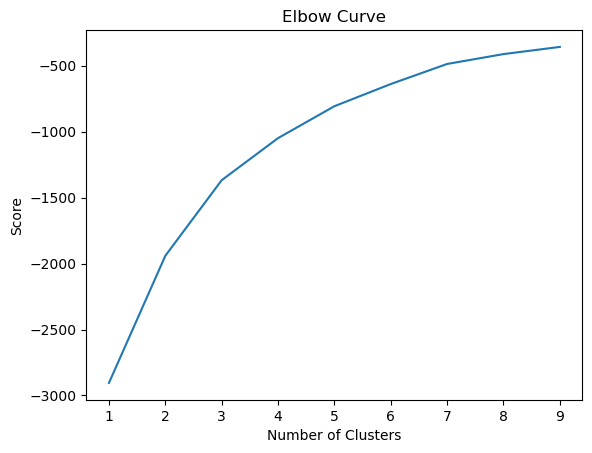

In [130]:
# Plot the elbow curve based on the above scores using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Again it appears the change levels off significantly after 4, so 4 clusters will be used again. 

In [131]:
# Create the k-means object with 4 clusters and and fitting it to the data set. 

kmeans = KMeans(n_clusters = 4) 


In [132]:
kmeans.fit(df_total_num_norm)

/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [133]:
# adding a new column to the data set that lists which cluster the row belongs to and counting how many
# rows belong to each cluster. 
df_total_num['clusters'] = kmeans.fit_predict(df_total_num_norm)

/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [134]:
df_total_num.head()

,year,ev_sales,ev_stock,ev_sales_share,ev_stock_share,charger_count,share_of_stock_sold,clusters
0,2010,0,0,0.00000,0.00000,0.0,0.00000,0
1,2011,49,49,0.00007,0.00000,0.0,1.00000,0
2,2012,250,300,0.00030,0.00003,0.0,0.83333,0
3,2013,290,590,0.00034,0.00005,0.0,0.49153,0
4,2014,1320,1880,0.00160,0.00017,0.0,0.70213,0


In [135]:
df_total_num['clusters'].value_counts()

clusters
0    211
1    184
3     15
2      5
Name: count, dtype: int64

# Visualizing the Clusters on Scatterplots

Since the only new variable included in this cluster analysis is charger count, that will be the focus of the visualizations. 

/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


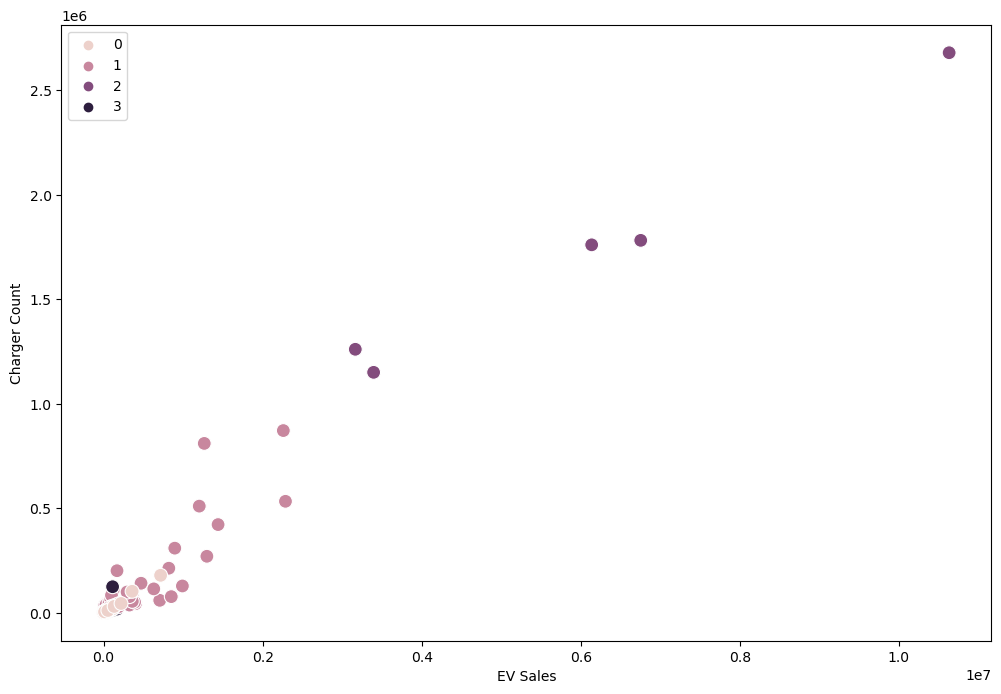

In [136]:
# Plot the clusters for the "EV Sales" and "Charger Count" variable with the values color coded by cluster. 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_total_num['ev_sales'], y=df_total_num['charger_count'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('EV Sales') # Label x-axis.
plt.ylabel('Charger Count') # Label y-axis.
plt.show()

Based on the above plot, the positive linear relationship between EV Sales and Charger Count is clear. It seems as though cluster 2, dark purple, is made up of data points where EV sales and charger count are both very high. There are very few data points in this cluster. 

Cluster 1, light purple corresponds to data points with significant EV sales and charger count, but not as much as cluster 2. There are many more data points in this cluster. 

Cluster 0, light pink, seems to correspond to data points where there are EV sales and available chargers, but both values are relatively low. 

It is difficult to tell from the plot what cluster 3, black, corresponds to. Further visuals and statistical analysis should help with this. 

/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


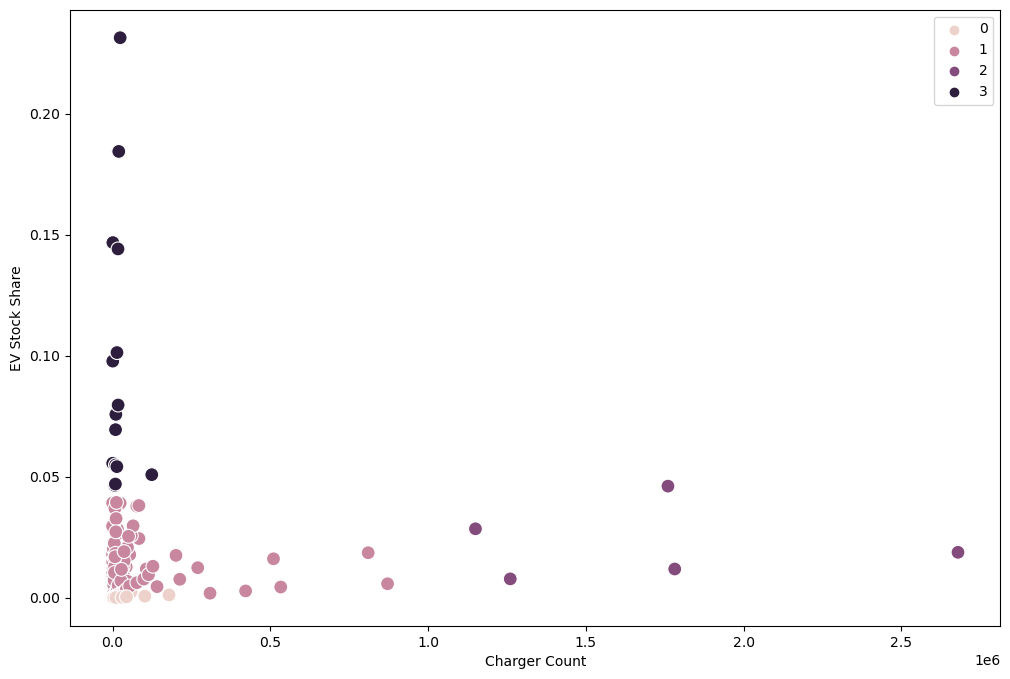

In [137]:
# Plot the clusters for the "EV Stock Share" and "Charger Count" variable with the values color coded by cluster. 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_total_num['charger_count'], y=df_total_num['ev_stock_share'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Charger Count') # Label x-axis.
plt.ylabel('EV Stock Share') # Label y-axis.
plt.show()

The main thing to learn from this plot is what makes cluster 3, black, different from the others. It is made up of data points where the EV share of stock (and as a result EV sales share) is significant (above about 6%). It is interesting to note that these data points are clustered along the left side of the plot. This means that in countries with a very high perentage of total vehicle stock made up of EVs, charger count is relatively low. This is most likely due to the fact that these data points correspond to markets like Norway and Iceland where population and total sales are relatively low, so the number of chargers are also most likely relatively low in comparison to bigger markets like the US and China. 

/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielmccormick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


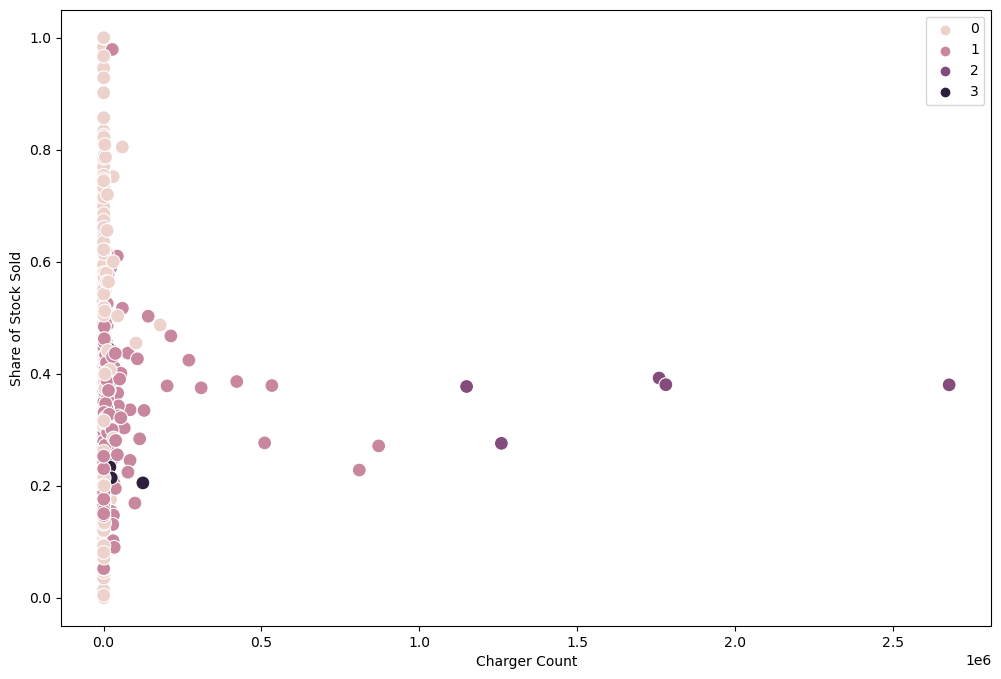

In [138]:
# Plot the clusters for the "Charger Count" and "Share of Stock Sold" variable with the values color coded by cluster. 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_total_num['charger_count'], y=df_total_num['share_of_stock_sold'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Charger Count') # Label x-axis.
plt.ylabel('Share of Stock Sold') # Label y-axis.
plt.show()

Based on this plot, it seems as though cluster 0, pink, has a lot of data points with very high share of stock sold. Most of the light pink data points are clustered along the left side of the plot meaning countries who sell through a significant percetnage of available EVs usually have low charger count. These would align with countries who have very low total EV sales but sell through a high percentage of available vehicles. 

Most of the data points in cluster 1, light purple, and cluster 2, dark purple, which correspond to countries with a lot of chargers, occurr beween 20-50% share of stock sold. This continues to highlight the point that markets with significant EV sales and EV infrastructure sell through about this much of available stock each year. It seems as though the data points that usually fell into one cluster in previous analyses that correspond to huge EV sales and EV stock in China have been split partially into cluster 1, pink, and the rest into cluster 2, dark purple. Again these points that correspond to the largest EV markets in terms of sales and stock, and now charger count, cluster around 40% of stock sold. 

Finally, the black points which correspond to markets with significant EV share of sales and share of stock seem to fall around 20-30% of share of stock sold, meaning these markets with significant EV market penetration have adequate EV supply as well. 

# Statistical Analysis & Conclusions

In [139]:
# renaming the clusters to their corresponding color and calculating the mean and median of each variable across
# each cluster
df_total_num.loc[df_total_num['clusters'] == 3, 'cluster'] = 'black'
df_total_num.loc[df_total_num['clusters'] == 2, 'cluster'] = 'dark purple'
df_total_num.loc[df_total_num['clusters'] == 1, 'cluster'] = 'light purple'
df_total_num.loc[df_total_num['clusters'] == 0, 'cluster'] = 'pink'

/var/folders/3x/syx5xv_d21d0hk0ckl4_nnr40000gn/T/ipykernel_9120/3396640275.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'black' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_total_num.loc[df_total_num['clusters'] == 3, 'cluster'] = 'black'


In [140]:
df_total_num.groupby('cluster').agg({'ev_sales':['mean', 'median'], 
                          'ev_stock':['mean', 'median'],'ev_sales_share':['mean', 'median'],
                            'ev_stock_share':['mean', 'median'],'charger_count':['mean', 'median'],
                            'share_of_stock_sold':['mean', 'median']})

ev_sales                 ev_stock              \
                      mean     median          mean      median   
cluster                                                           
black         8.365700e+04    74812.0  3.087667e+05    251755.0   
dark purple   6.016756e+06  6137300.0  1.636889e+07  15642700.0   
light purple  1.247666e+05    18988.0  3.706734e+05     49485.0   
pink          1.454103e+04      601.0  2.956147e+04      1520.0   

             ev_sales_share           ev_stock_share          charger_count  \
                       mean    median           mean   median          mean   
cluster                                                                       
black              0.478653  0.451010       0.095928  0.07574  1.855667e+04   
dark purple        0.126504  0.120700       0.022594  0.01876  1.726154e+06   
light purple       0.051016  0.022635       0.007668  0.00421  3.672414e+04   
pink               0.005177  0.001200       0.000664  0.00015  3.678775e+03   

                        share_of_stock_sold           
                 median                mean   median  
cluster                                               
black           10500.0            0.298341  0.29716  
dark purple   1760000.0            0.361166  0.38016  
light purple     4795.0            0.368835  0.37244  
pink                6.0            0.442021  0.46857

- As expected the black cluster corresponds to markets with significant EV sales share and EV stock share. EV sales share mean and median of around 50%, EV stock share mean about 10% and median about 8%. These are significant levels of EV market penetration. As expected, these markets are substantial but not huge in terms of total EV sales. It is noteworthy that in these markets, EV stock is fairly significant and share of stock sold is reasonable at around 30%. This highlights that these markets with high penetration tend to have significant supply available. Also of note is an average charger count of about 18,000 and a median of 10,500. Compared to the biggest markets these are not huge numbers for chargers but these are smaller markets in total size with high EV penetration. 
- Pink corresponds to markets with relatively low total EV sales and EV stock, as well as low EV sales share and EV stock share. These markets, which are small and do not have significant EV penetration, also tend to have few available chargers. 
- As expected dark purple corresponds to markets with massive EV sales, EV stock, and charger count with an average of about 1.7M chargers available. This is almost certainly the most recent years of the data set for China. 
- Finally, light purple seems to capture the remaining markets that have higher EV sales and Stock, as well as fairly significant EV market penetration. These markets are most of the countries in the data set with active EV markets. The average charger count in these countries is about 37,000 with a median of about 5,000. 

- In markets with the highest EV penetration, available charger count is relatively low. This most likeley corresponds to markets like Norway and Iceland. These same markets also have significant available EV stock. 
- Markets with the highest EV sell through have very few available chargers. These are markets with low supply and low sales as well. 
- Markets with higher charger count tend to see sell through of about 20-50% of available EV stock. This aligns with results from previous cluster analyses where markets with significant sales and stock also saw this level of sell through. 